In [516]:
import numpy as np      
import pandas as pd     
from pandas.plotting import autocorrelation_plot as auto_corr


import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
# from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing




# import warnings
# warnings.filterwarnings("ignore")


In [517]:
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from statsmodels.tsa.stattools import adfuller, acf, pacf
# from statsmodels.tsa.arima_model import ARIMA
# !pip install pmdarima
# from pmdarima.utils import decomposed_plot
# from pmdarima.arima import decompose
# from pmdarima import auto_arima

In [518]:
df_store=pd.read_csv("files/stores.csv")
df_feature=pd.read_csv("files/features.csv")
df_train=pd.read_csv("files/train.csv")

# Making datasets ready - view ,merge,....

In [520]:
df_store.head((5))

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [521]:
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [522]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [523]:
df=df_train.merge(df_feature,on=["Store","Date"],how= "inner").merge(df_store,on=["Store"],how="inner")

In [524]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [525]:
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column

In [526]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column

In [527]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [528]:
df.shape

(421570, 16)

# Data wrangling

In [530]:
df.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
Type                 3
Size                40
dtype: int64

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [532]:
df["Store"].nunique()

45

In [533]:
df["Dept"].nunique()

81

# Store and Department
# Average weekly sales of each departments  of all stores 

In [535]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_1375/2014498793.py:1: FutureWarning: The provided callable <function mean at 0x1061bc720> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',


Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [536]:
store_dept_table.columns

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56,
       58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype='int64', name='Dept')

In [537]:
store_dept_table.shape

(45, 81)


 ### - 8 columns are missing 
 ### - some store contains  weekly sales value zero or value in negative which is impossible 

In [539]:
df.loc[df["Weekly_Sales"]<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


- ###  1358 rows in 421570 rows means 0.3%, so these rows can  be deleted and ignore these rows which contains wrong sales values.

In [541]:
df=df.loc[df["Weekly_Sales"]>0]

In [542]:
df.shape # new dataframe shape

(420212, 16)

# Date

In [544]:
df['Date'].unique # to see first and last 5 rows.


<bound method Series.unique of 0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
             ...    
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, Length: 420212, dtype: object>

In [545]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


### Date is in the range from 5th of feburary 2010 t0 10th of october 2012 

In [547]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.isocalendar().week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

# Is holiday

In [549]:
df["IsHoliday"].unique()

array([False,  True])

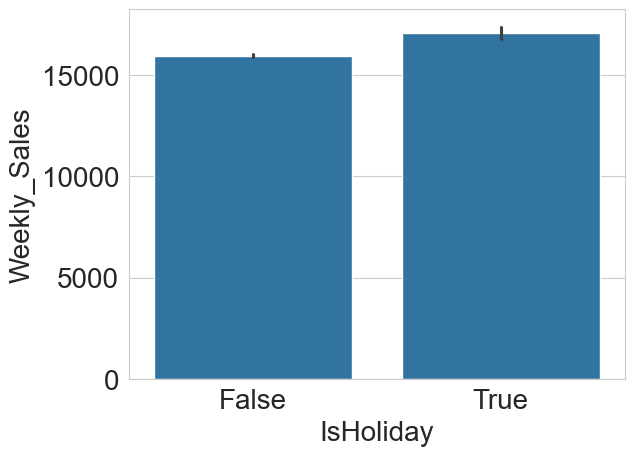

In [550]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.show()

In [551]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

In [552]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

----
All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

 When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

In [554]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False


In [555]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [556]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [557]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

In [558]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,8.106,A,151315,5,2,2010,False,False,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,8.106,A,151315,6,2,2010,True,False,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,8.106,A,151315,7,2,2010,False,False,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,8.106,A,151315,8,2,2010,False,False,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,8.106,A,151315,9,3,2010,False,False,False,False


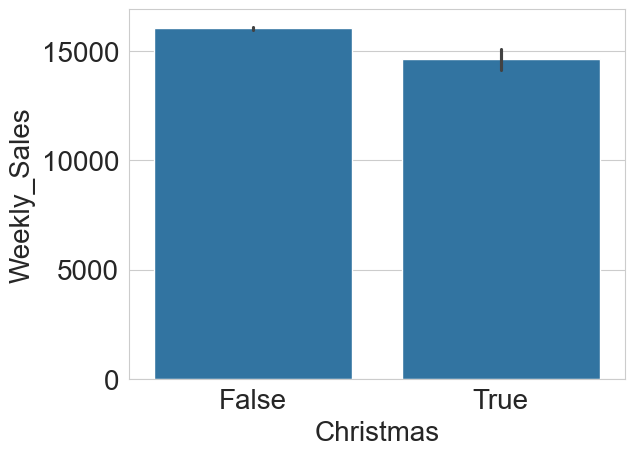

In [559]:
sns.barplot(data=df,x="Christmas",y="Weekly_Sales")
plt.show()
# sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas

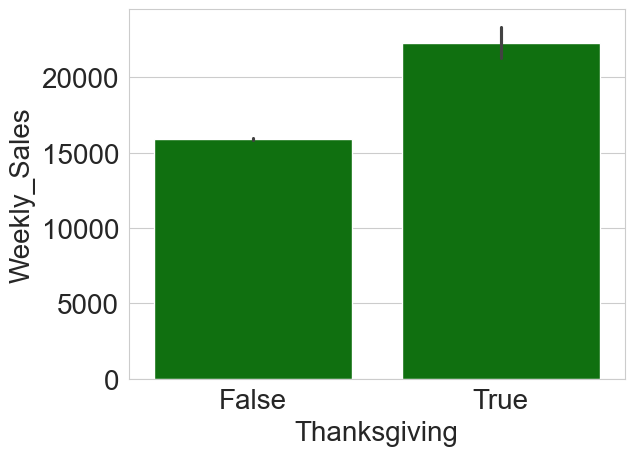

In [560]:
sns.barplot(data=df,x="Thanksgiving",y="Weekly_Sales",color="green")
plt.show()

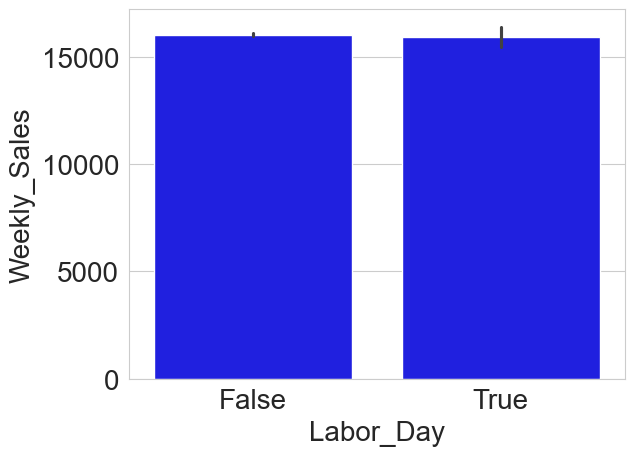

In [561]:
sns.barplot(data=df,x="Labor_Day",y="Weekly_Sales",color="blue")
plt.show()

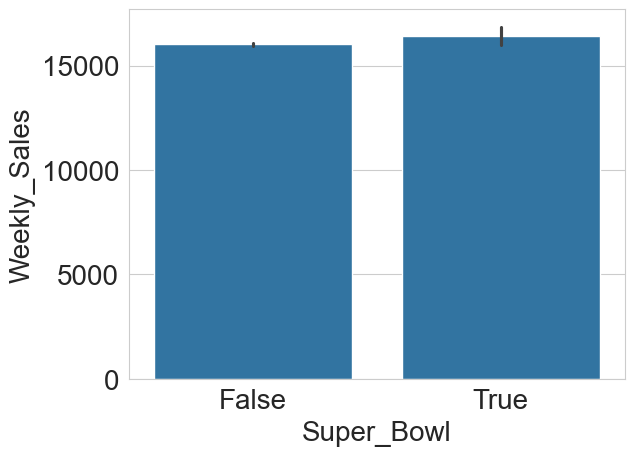

In [562]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl
plt.show()

----------
It is shown that for the graphs, Labor Day and Christmas do not increase weekly average sales. There is positive effect on sales in Super bowl, but the highest difference is in the Thanksgiving. Maybe, people generally prefer to buy Christmas gifts 1-2 weeks before Christmas, so it does not change sales in the Christmas week. And, there is Black Friday sales in the Thanksgiving week.

-------

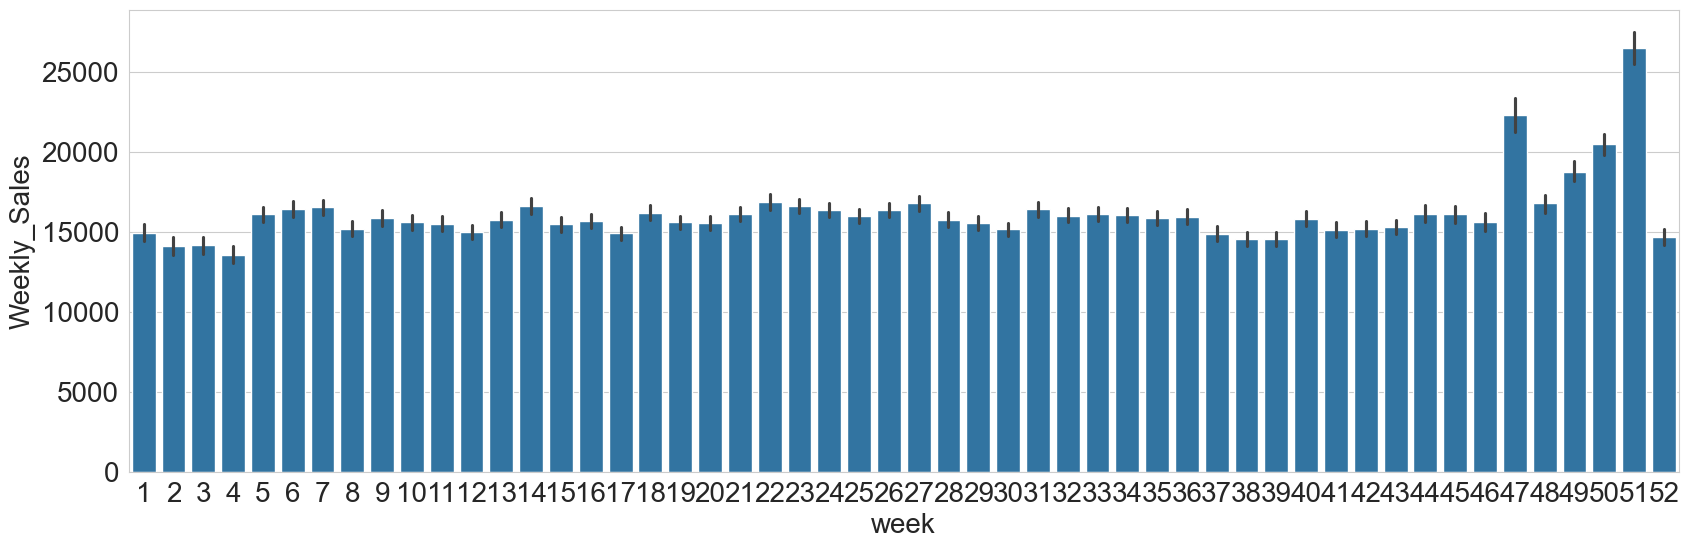

In [564]:
plt.figure(figsize=(20,6))
sns.barplot(x='week', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl
plt.show()

## Type Effect on Holidays

In [566]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'month',
       'year', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas'],
      dtype='object')

In [567]:
print(df.groupby(['Christmas','Type'])['Weekly_Sales'].mean())  # Avg weekly sales for types on Christmas 
print(df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean())  # Avg weekly sales for types on Labor_Day 
print(df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean())  # Avg weekly sales for types on Thanksgiving 
print(df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean())  # Avg weekly sales for types on Super_Bowl 

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64
Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64
Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64
Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64


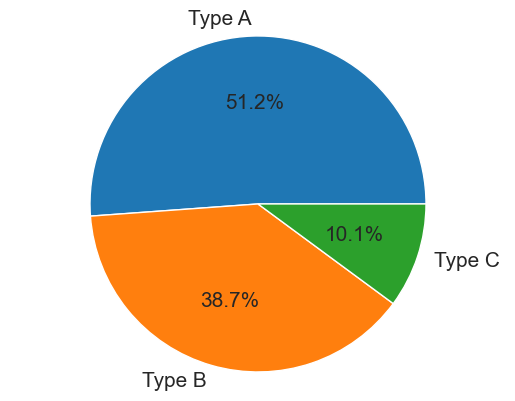

In [568]:
percentages = df['Type'].value_counts(normalize=True) * 100
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(percentages ,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [569]:
percentages

Type
A    51.155369
B    38.739255
C    10.105375
Name: proportion, dtype: float64

In [570]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()


IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

- ### Half of the stores are of type A

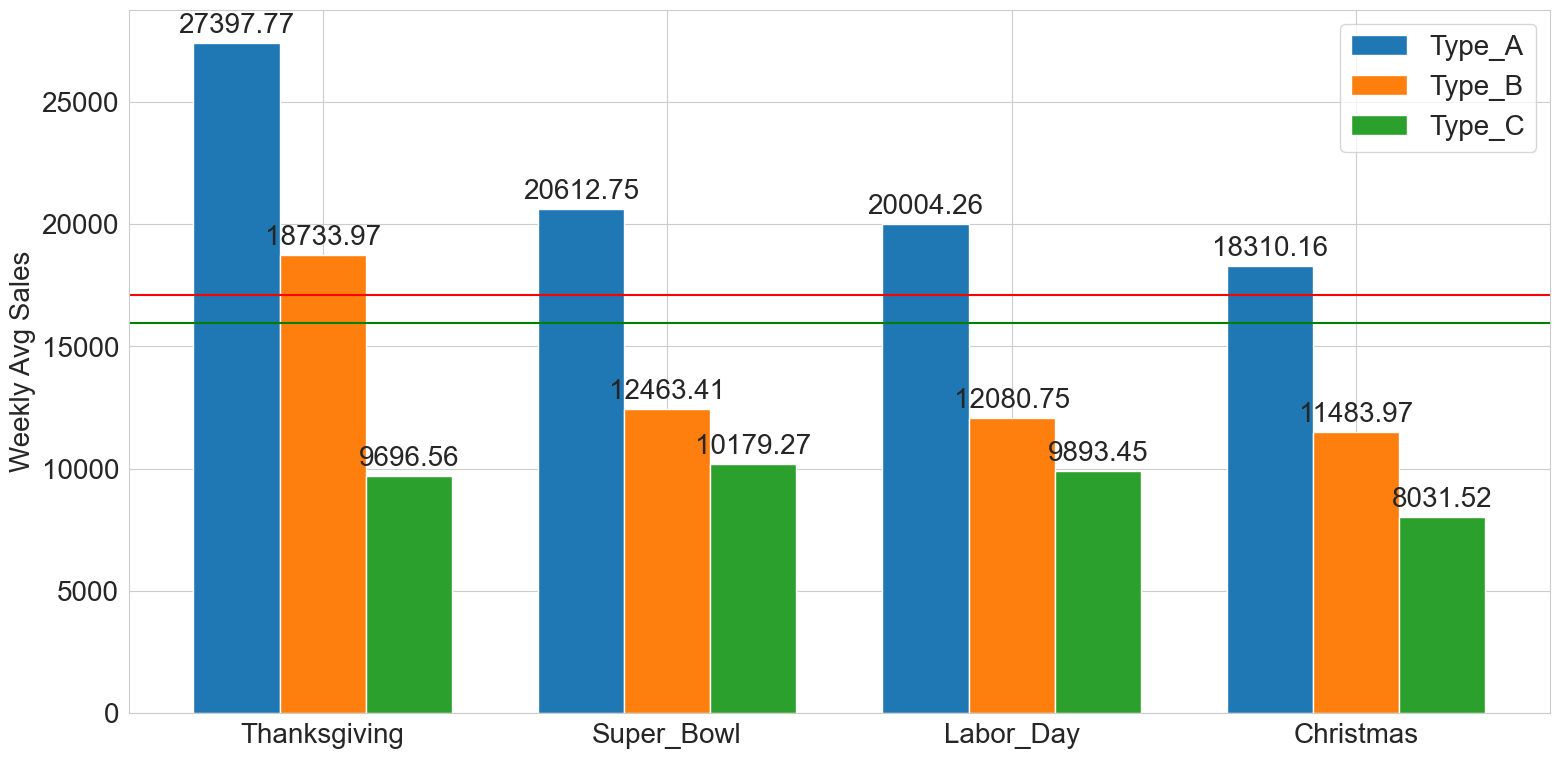

In [572]:
# Plotting avg wekkly sales according to holidays by types
sns.set_style('whitegrid')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

----
- ### It is seen from the graph that, highest sale average is in the Thanksgiving week between holidays. And, for all holidays Type A stores has highest sales.
------

In [574]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
95373,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,...,9.003,B,126512,47,11,2010,False,False,True,False
338013,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,...,8.745,B,103681,47,11,2011,False,False,True,False
95425,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,...,7.874,B,126512,47,11,2011,False,False,True,False
337961,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,...,8.763,B,103681,47,11,2010,False,False,True,False
135665,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,...,8.724,A,200898,47,11,2010,False,False,True,False


-----
#### All top weekly sales are of Thanksgiving 
------

To See the Size - Type Relation

In [577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     150181 non-null  float64       
 8   MarkDown2     110904 non-null  float64       
 9   MarkDown3     136651 non-null  float64       
 10  MarkDown4     134518 non-null  float64       
 11  MarkDown5     150929 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420212 n

In [578]:
df[["month","week","Type","IsHoliday","Super_Bowl","Labor_Day","Thanksgiving","Christmas"]]=df[["month","week","Type","IsHoliday","Super_Bowl","Labor_Day","Thanksgiving","Christmas"]].astype("category")

In [579]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  category      
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     150181 non-null  float64       
 8   MarkDown2     110904 non-null  float64       
 9   MarkDown3     136651 non-null  float64       
 10  MarkDown4     134518 non-null  float64       
 11  MarkDown5     150929 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  category      
 15  Size          420212 n

### To See the Size - Type Relation

In [581]:
df_store.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


In [582]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week', 'month',
       'year', 'Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas'],
      dtype='object')

In [583]:
df["Type"].value_counts()

Type
A    214961
B    162787
C     42464
Name: count, dtype: int64

In [584]:
df_store.groupby('Type').describe()

Store                                                        Size  \
     count       mean        std   min    25%   50%    75%   max count   
Type                                                                     
A     22.0  22.227273  13.078269   1.0  11.50  25.0  32.75  41.0  22.0   
B     17.0  18.352941  11.028039   3.0  10.00  17.0  23.00  45.0  17.0   
C      6.0  39.000000   5.215362  30.0  37.25  40.0  42.75  44.0   6.0   

                                                                           \
               mean           std      min        25%       50%       75%   
Type                                                                        
A     177247.727273  49392.621098  39690.0  155840.75  202406.0  203819.0   
B     101190.705882  32371.137916  34875.0   93188.00  114533.0  123737.0   
C      40541.666667   1304.145033  39690.0   39745.00   39910.0   40774.0   

                
           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0

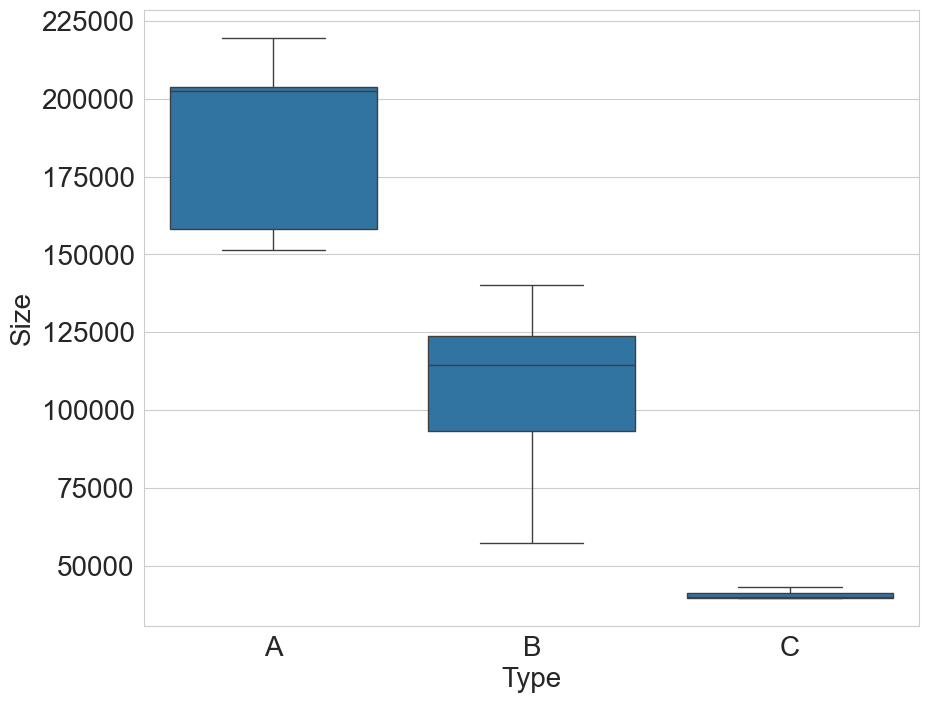

In [585]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)
plt.show()


---
### Size of the type of stores are consistent with sales, as expected. Higher size stores has higher sales.
---

# Markdown columns 

In [588]:
df.sample()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
153434,16,42,2010-07-30,3733.4,False,70.71,2.69,NaN,NaN,NaN,...,6.868,B,57197,30,7,2010,False,False,False,False


---
- there are lot of nan values on markdown column so changing to zero if there is no markdown 

In [647]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
Type                 0
Size                 0
week                 0
month                0
year                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [657]:
# df["MarkDown1"] = df["MarkDown1"].fillna(0) # as there are no null values except on markdown columns 
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numerical_cols] = df[numerical_cols].fillna(0)

In [659]:
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
week            0
month           0
year            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [665]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,420212.0,22.195611,1.0,11.0,22.0,33.0,45.0,12.787236
Dept,420212.0,44.241309,1.0,18.0,37.0,74.0,99.0,30.508819
Date,420212,2011-06-18 07:35:12.682169600,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,420212.0,16033.114591,0.01,2120.13,7661.7,20271.265,693099.36,22729.492116
Temperature,420212.0,60.090599,-2.06,46.68,62.09,74.28,100.14,18.447857
Fuel_Price,420212.0,3.36089,2.472,2.933,3.452,3.738,4.468,0.458519
MarkDown1,420212.0,2590.323565,0.0,0.0,0.0,2809.05,88646.76,6053.415601
MarkDown2,420212.0,878.905242,-265.76,0.0,0.0,2.4,104519.54,5076.928566
MarkDown3,420212.0,468.845949,-29.1,0.0,0.0,4.54,141630.61,5534.069859
MarkDown4,420212.0,1083.534361,0.0,0.0,0.0,425.29,67474.85,3896.068938


In [667]:
df.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,year
count,420212.000000,420212.000000,420212,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,2011-06-18 07:35:12.682169600,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787,2010.968454
min,1.000000,1.000000,2010-02-05 00:00:00,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,2010.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,2010.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000,2011.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000,2012.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000
std,12.787236,30.508819,NaN,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568,0.796898


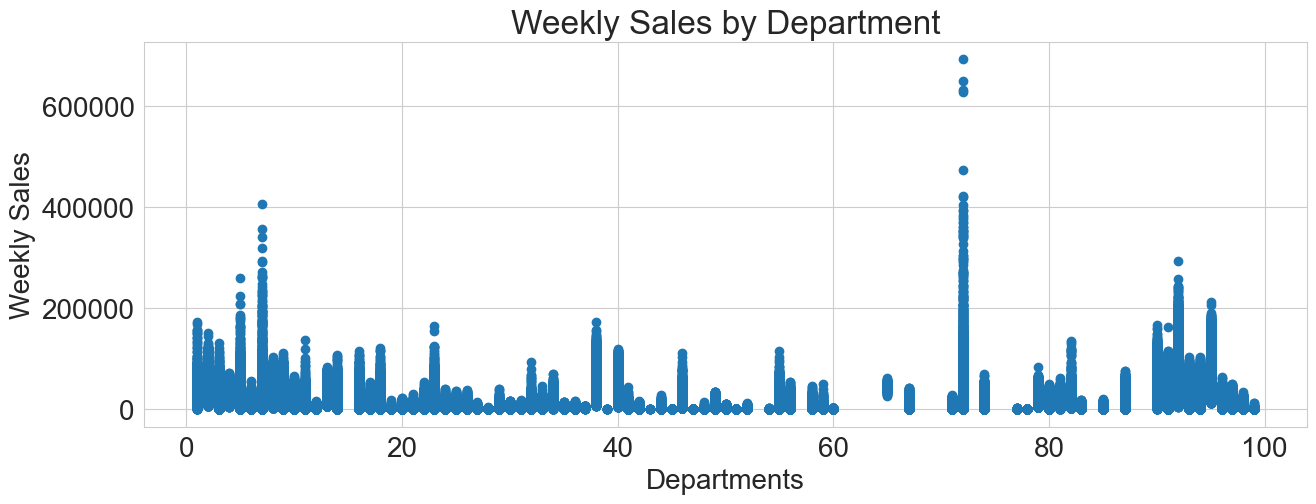

In [669]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

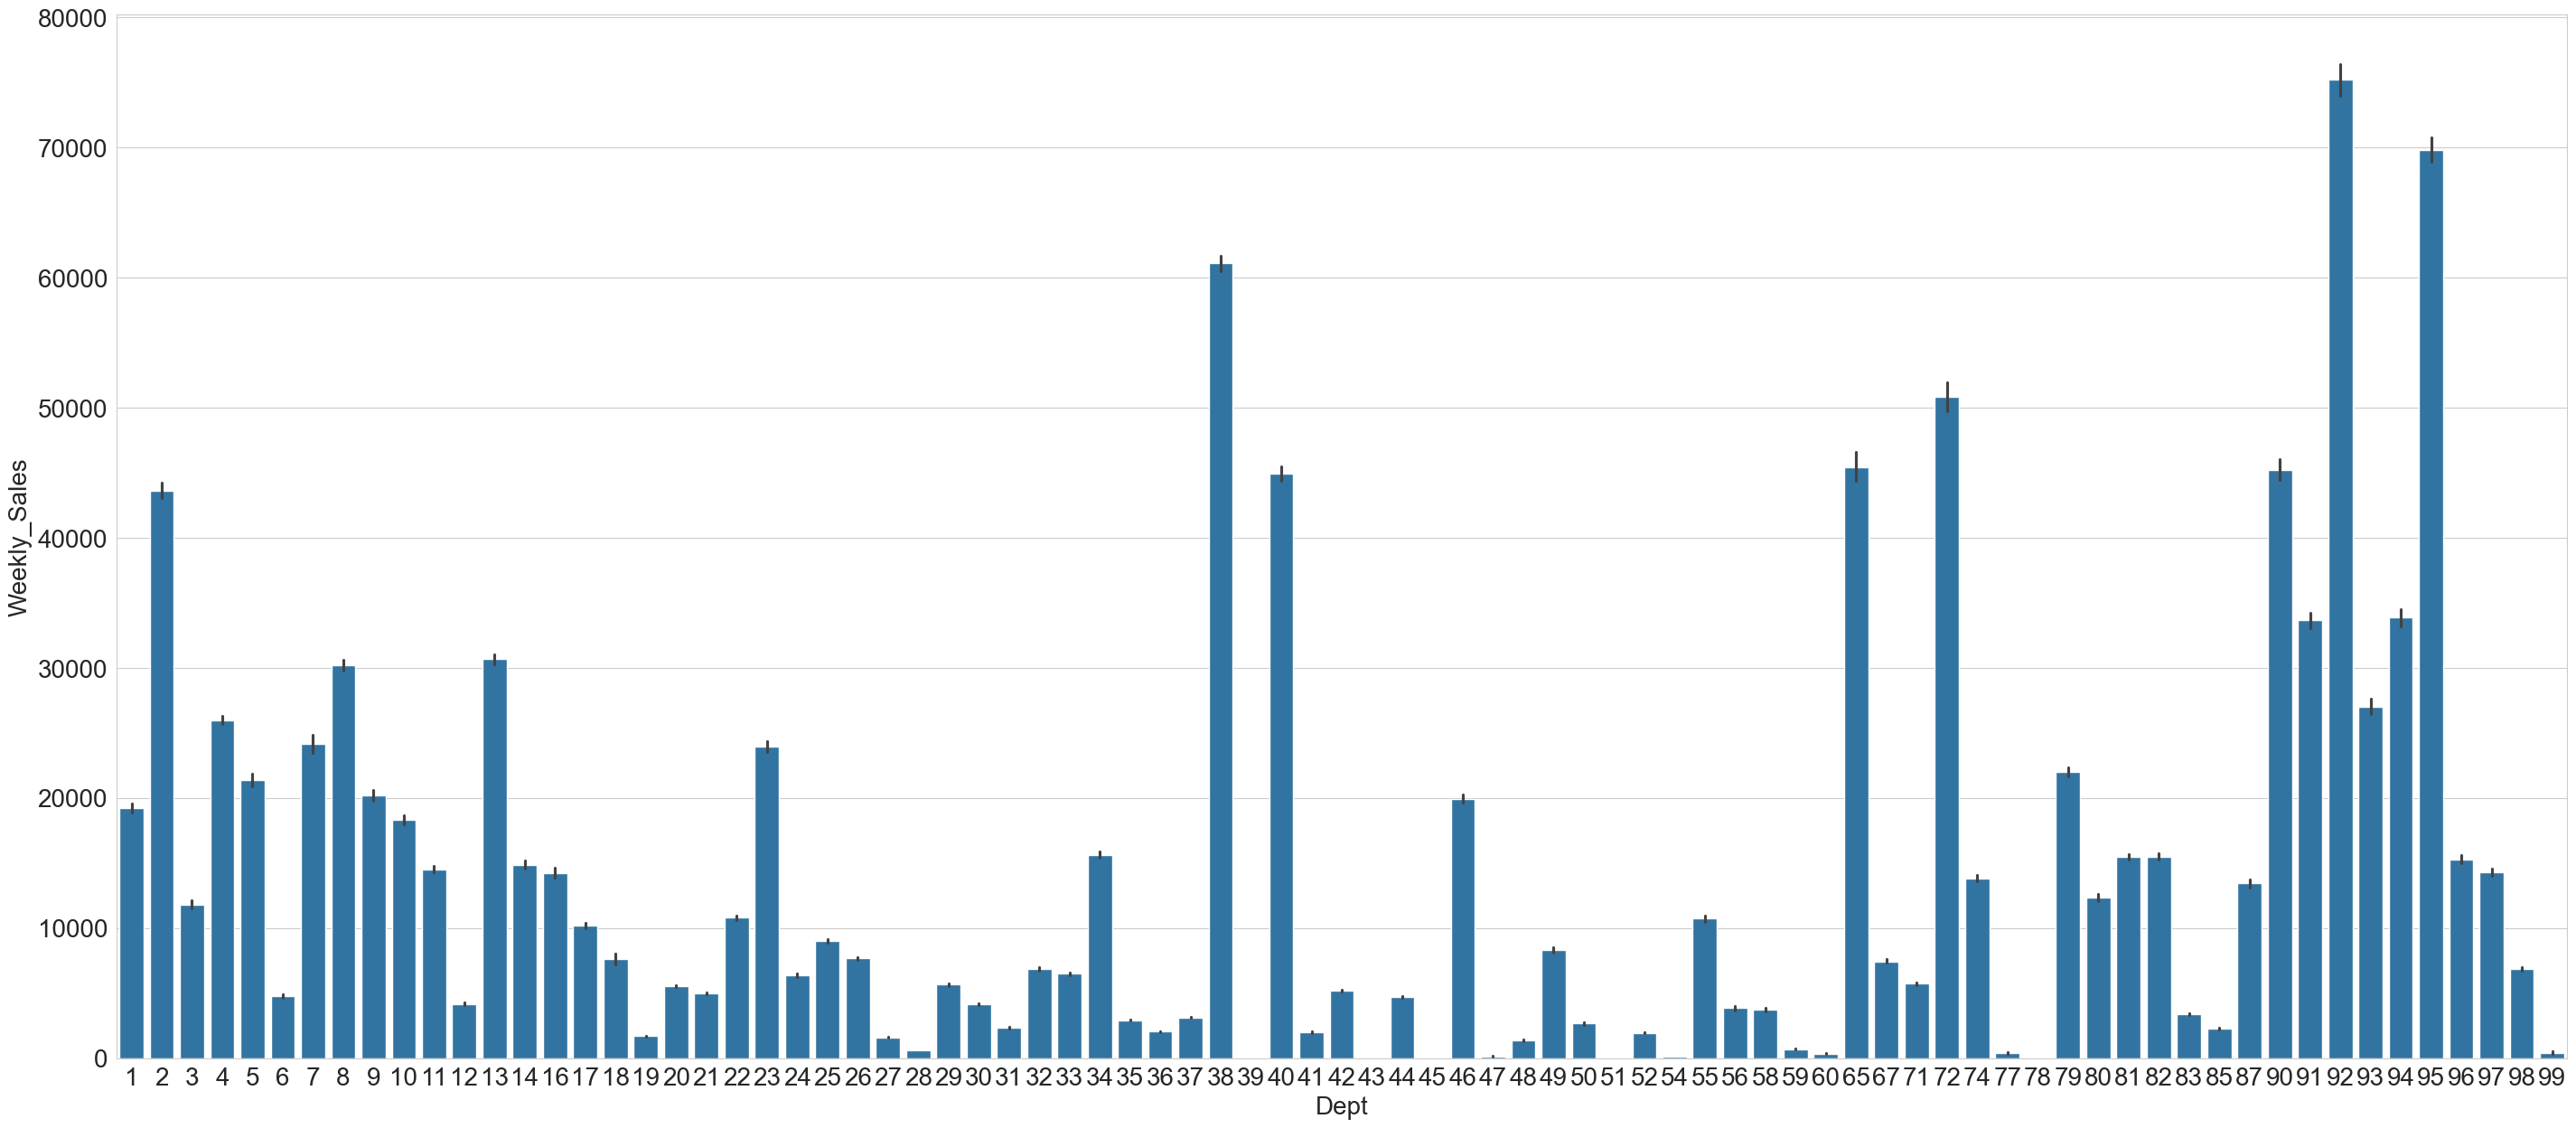

In [683]:
plt.figure(figsize=(35,15))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.show()

----
-----
- #### From the first graph, it is seen that one department between 60-80(assume it is 72), has higher sales values. But, when we take the averages, it is seen that department 92 has higher mean sales. Department 72 is seasonal department, Maybe. It has higher values in some seasons but on average 92 is higher.

---
---

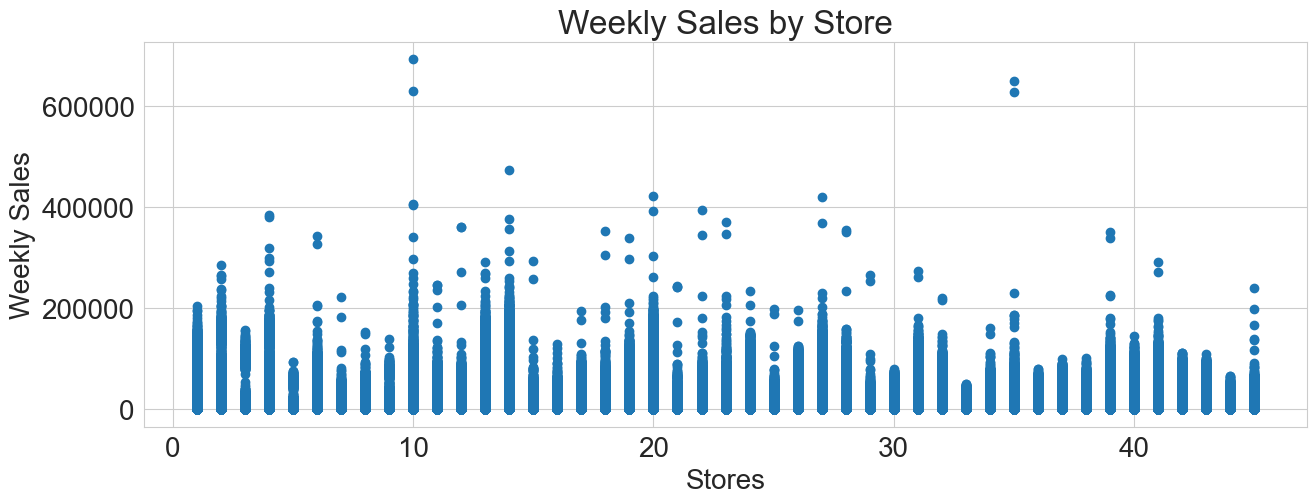

In [690]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

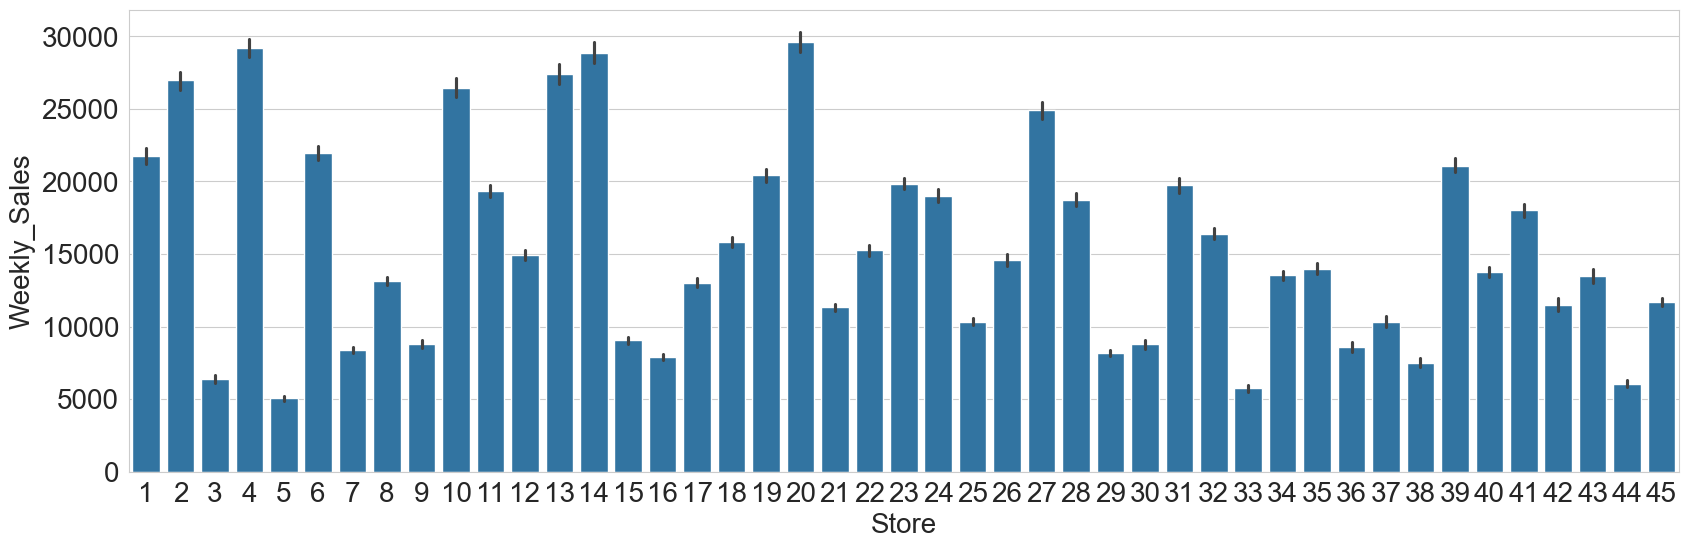

In [696]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.show()

# Date 

In [699]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales


/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_1375/3467041992.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales


month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [701]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales


year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

In [703]:
df.groupby('week')['Weekly_Sales'].mean() # to see the best years for sales


/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_1375/357002486.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('week')['Weekly_Sales'].mean() # to see the best years for sales


week
1     14928.038770
2     14095.340803
3     14133.401201
4     13569.438615
5     16073.160123
6     16418.777595
7     16517.946636
8     15177.816351
9     15867.717934
10    15583.429172
11    15497.387297
12    14954.904997
13    15756.015034
14    16588.225710
15    15456.223652
16    15663.901397
17    14889.547013
18    16158.987584
19    15600.243681
20    15522.435381
21    16100.570724
22    16856.650245
23    16586.437581
24    16327.096649
25    15972.974790
26    16357.564080
27    16767.002503
28    15742.945870
29    15520.512898
30    15151.930162
31    16384.477997
32    15997.046151
33    16097.359785
34    16024.670562
35    15861.051631
36    15934.061154
37    14872.685250
38    14564.951296
39    14540.344962
40    15815.394715
41    15107.455450
42    15192.028275
43    15282.281277
44    16093.754523
45    16096.508110
46    15617.630356
47    22269.601768
48    16759.704581
49    18731.794840
50    20478.421134
51    26454.164116
52    14635.139843
Name: W

/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_1375/3196371630.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")


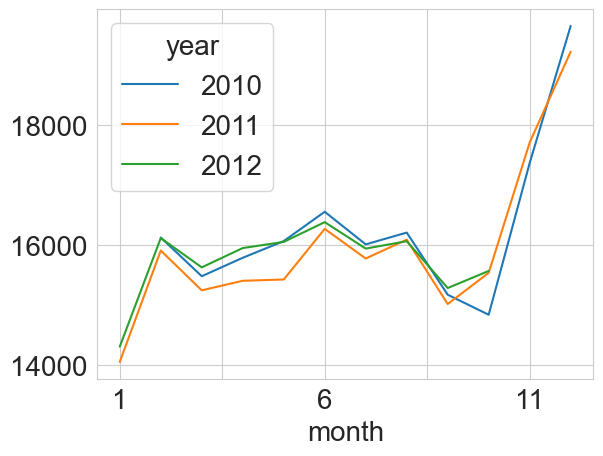

In [707]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot
plt.show()


-----
#### When we look at the mean sales it is seen that 2010 has higher values

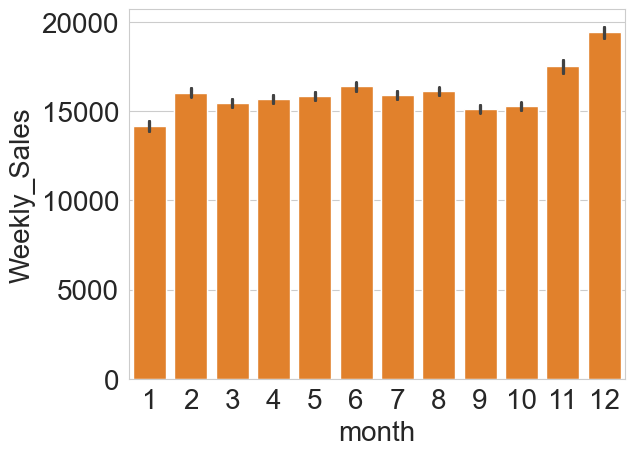

In [713]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)
plt.show()

----
#### When we look at the graph above, the best sales are in December and November. The highest values are belongs to Thankgiving holiday but on average December has the best value.

In [719]:
df.sample()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
324527,34,30,2011-06-10,2350.9,False,74.57,3.64,0.0,0.0,0.0,...,10.581,A,158114,23,6,2011,False,False,False,False


In [721]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()


/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_1375/3454612713.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()


week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64


----
Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May....

----

/var/folders/49/2yb8tvwd13q0h205019lpz540000gn/T/ipykernel_1375/1878832492.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")


<Figure size 1000x3000 with 0 Axes>

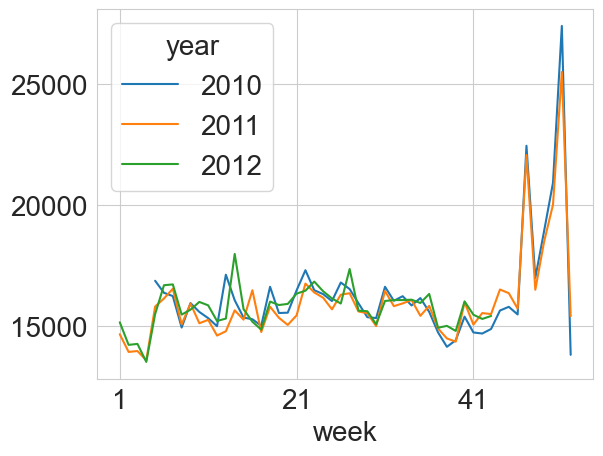

In [761]:
plt.figure(figsize=(10,30))
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()
plt.show()

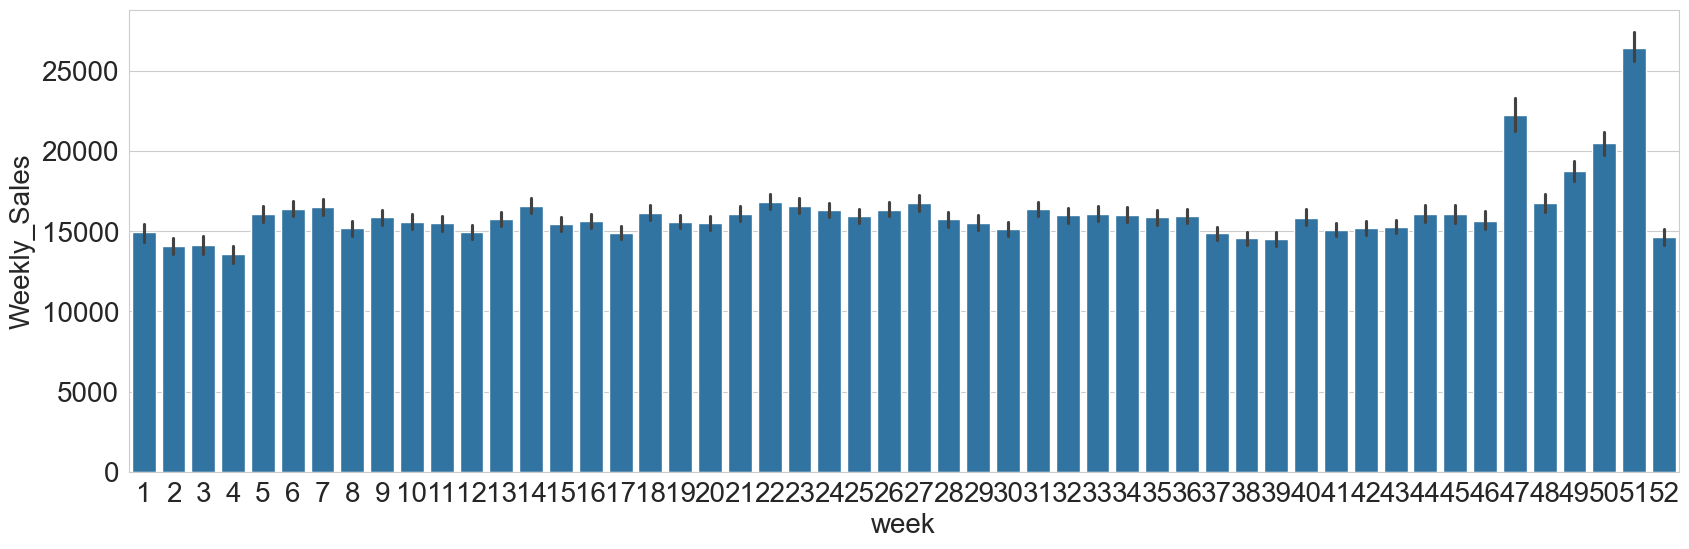

In [744]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)
plt.show()

## Fuel Price, CPI , Unemployment , Temperature Effects¶

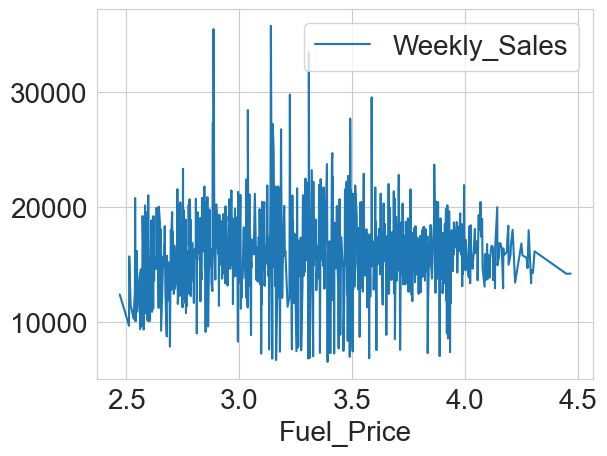

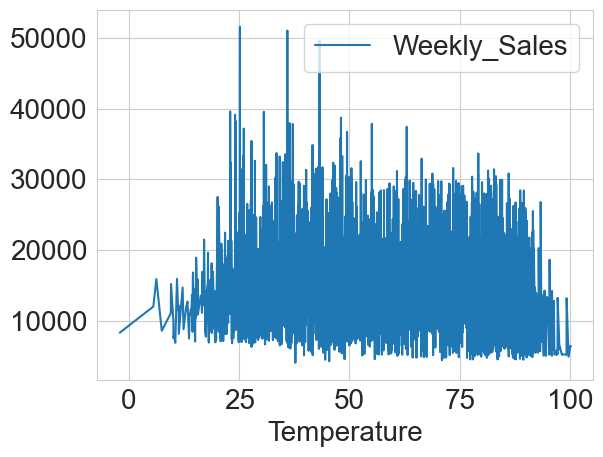

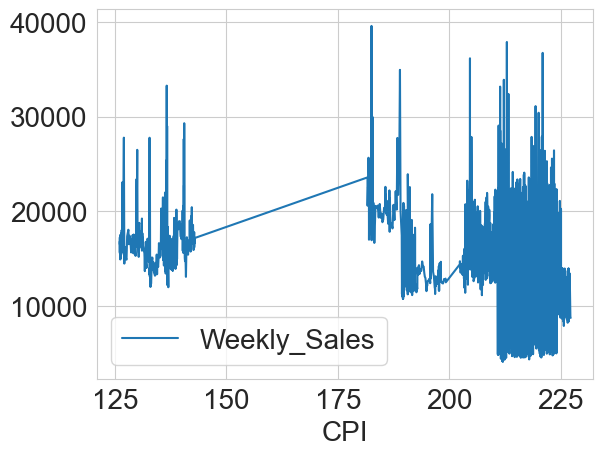

In [765]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

plt.show()

#### From graphs, it is seen that there are no significant patterns between CPI, temperature, unemployment rate, fuel price vs weekly sales. There is no data for CPI between 140-180 also

# Making new dataframe from this cleaned dataframe

In [771]:
df.to_csv("files/cleaned_df.csv")

In [774]:
pd.options.display.max_columns=100

In [780]:
df = pd.read_csv('files/cleaned_df.csv')

In [ ]:
df.head()

In [783]:
df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2,2010,False,False,False,False
1,1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,6,2,2010,True,False,False,False
2,2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,7,2,2010,False,False,False,False
3,3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,8,2,2010,False,False,False,False
4,4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,9,3,2010,False,False,False,False


In [795]:
df.drop(columns=["Unnamed: 0"],inplace=True)


In [799]:
df.sample()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year,Super_Bowl,Labor_Day,Thanksgiving,Christmas
176245,18,95,2010-07-09,77799.58,False,79.75,2.806,0.0,0.0,0.0,0.0,0.0,132.546133,9.342,B,120653,27,7,2010,False,False,False,False


In [801]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   MarkDown1     420212 non-null  float64
 8   MarkDown2     420212 non-null  float64
 9   MarkDown3     420212 non-null  float64
 10  MarkDown4     420212 non-null  float64
 11  MarkDown5     420212 non-null  float64
 12  CPI           420212 non-null  float64
 13  Unemployment  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
 16  week          420212 non-null  int64  
 17  month         420212 non-null  int64  
 18  year

In [803]:
df['Date'] = pd.to_datetime(df['Date'])

In [805]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     420212 non-null  float64       
 8   MarkDown2     420212 non-null  float64       
 9   MarkDown3     420212 non-null  float64       
 10  MarkDown4     420212 non-null  float64       
 11  MarkDown5     420212 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420